In [294]:
import pandas as pd
import pymssql
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted
from matplotlib import pyplot as plt

In [295]:
from config import database
from config import Mouse
from config import Virus
from config import Protein
from config import Biotin
from config import Fraction
from config import Protein_Id
from config import Gene
from config import Protein_Description
from config import Peptide
from config import username
from config import password
from config import server

# Create df with all protein names

In [296]:
try:
    conn = pymssql.connect(server,username, password,database)

    cursor = conn.cursor()
    query = f"""
    SELECT 
        P.Protein_Name,
        V.Virus_Label,
        B.Biotin_Label,
        F.Fraction_Label,
        SUM(MP.Hits) AS Hits
        FROM Mouse_Protein AS MP 
    INNER JOIN {Mouse} AS M on MP.Mouse_ID = M.Mouse_ID
    INNER JOIN {Protein} AS P on MP.Protein_ID = P.Protein_ID
    INNER JOIN {Virus} AS V on M.Virus_ID = V.Virus_ID
    INNER JOIN {Biotin} AS B on M.Biotin_ID = B.Biotin_ID
    INNER JOIN {Fraction} AS F on M.Fraction_ID = F.Fraction_ID
    INNER JOIN {Protein_Id} AS PI on P.Protein_Id_ID = PI.Protein_Id_ID
    INNER JOIN {Gene} AS G on P.Gene_ID = G.Gene_ID
    INNER JOIN {Protein_Description} AS PD on P.Description_ID = PD.Description_ID
    INNER JOIN {Peptide} AS PE on P.Peptide_ID = PE.Peptide_ID
    GROUP BY P.Protein_Name, V.Virus_Label,B.Biotin_Label,F.Fraction_Label
    ORDER BY Hits DESC
    """
    main_df = pd.read_sql(query, conn)
except Exception as e:
    print(e)
main_df.head()

,Protein_Name,Virus_Label,Biotin_Label,Fraction_Label,Hits
0,NFH_MOUSE,TDP43-TurboID,72,LP1,5.225510e+09
1,NFL_MOUSE,TDP43-TurboID,72,LP1,4.174620e+09
2,H2A1B_MOUSE;H2A1C_MOUSE;H2A1D_MOUSE;H2A1E_MOUS...,TDP43-TurboID,72,LP1,3.127040e+09
3,TBA1A_MOUSE,TDP43-TurboID,72,LP1,3.018330e+09
4,PLEC-6_MOUSE;PLEC-7_MOUSE;PLEC-8_MOUSE,TDP43-TurboID,72,LP1,2.856640e+09


# Create different dfs for each Virus, Biotin, Fraction combo

In [297]:
print("Virus types:", list(main_df["Virus_Label"].unique()))
print("Biotin types:", list(main_df["Biotin_Label"].unique()))
print("Fraction types:", list(main_df["Fraction_Label"].unique()))
print("Total rows of data:", len(main_df), "\nWith 24 data frame combos")

Virus types: ['TDP43-TurboID', 'TurboID']
Biotin types: ['72', '1.5', 'saline']
Fraction types: ['LP1', 'whole brain', 'LS1', 'Nuclear']
Total rows of data: 76479 
With 24 data frame combos


In [298]:
# Virus type _ Biotin type _ Fraction Type  =  labeling scheme for dfs

# TurboID virus & 72 Biotin combonations
TurboID_72_LP1 = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LP1"]
TurboID_72_wholebrain = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]
TurboID_72_LS1 = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LS1"]
TurboID_72_Nuclear = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "Nuclear"]

# TurboID virus & 1.5 Biotin combonations
TurboID_15_LP1 = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "LP1"]
TurboID_15_wholebrain = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "whole brain"]
TurboID_15_LS1 = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "LS1"]
TurboID_15_Nuclear = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "Nuclear"]

# TurboID virus & saline Biotin combonations
TurboID_saline_LP1 = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "LP1"]
TurboID_saline_wholebrain = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "whole brain"]
TurboID_saline_LS1 = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "LS1"]
TurboID_saline_Nuclear = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "Nuclear"]

# TDP43-TurboID virus & 72 Biotin combonations
TDP43TurboID_72_LP1 = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LP1"]
TDP43TurboID_72_wholebrain = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]
TDP43TurboID_72_LS1 = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LS1"]
TDP43TurboID_72_Nuclear = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "Nuclear"]

# TDP43-TurboID virus & 1.5 Biotin combonations
TDP43TurboID_15_LP1 = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "LP1"]
TDP43TurboID_15_wholebrain = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "whole brain"]
TDP43TurboID_15_LS1 = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "LS1"]
TDP43TurboID_15_Nuclear = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "Nuclear"]

# TDP43-TurboID virus & saline Biotin combonations
TDP43TurboID_saline_LP1 = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "LP1"]
TDP43TurboID_saline_wholebrain = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "whole brain"]
TDP43TurboID_saline_LS1 = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "LS1"]
TDP43TurboID_saline_Nuclear = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "Nuclear"]

# Total amount of row captured check, should get a total of zero
print("Should be zero:", len(main_df) - (len(TurboID_72_LP1) + len(TurboID_72_wholebrain) + len(TurboID_72_LS1) + len(TurboID_72_Nuclear)
                    + len(TurboID_15_LP1) + len(TurboID_15_wholebrain) + len(TurboID_15_LS1) + len(TurboID_15_Nuclear)
                    + len(TurboID_saline_LP1) + len(TurboID_saline_wholebrain) + len(TurboID_saline_LS1) + len(TurboID_saline_Nuclear)
                    
                    + len(TDP43TurboID_72_LP1) + len(TDP43TurboID_72_wholebrain) + len(TDP43TurboID_72_LS1) + len(TDP43TurboID_72_Nuclear)
                    + len(TDP43TurboID_15_LP1) + len(TDP43TurboID_15_wholebrain) + len(TDP43TurboID_15_LS1) + len(TDP43TurboID_15_Nuclear)
                    + len(TDP43TurboID_saline_LP1) + len(TDP43TurboID_saline_wholebrain) + len(TDP43TurboID_saline_LS1) + len(TDP43TurboID_saline_Nuclear)))

C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_21068\1740437975.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TurboID_72_LP1 = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LP1"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_21068\1740437975.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TurboID_72_wholebrain = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_21068\1740437975.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TurboID_72_LS1 = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LS1"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_21068\1740437975.py:7: UserWarning: Boolean Series key will be reindexed to match DataFra

Should be zero: 0


C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_21068\1740437975.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_saline_LP1 = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "LP1"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_21068\1740437975.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_saline_wholebrain = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "whole brain"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_21068\1740437975.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_saline_LS1 = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "LS1"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_21068\1740437975.py:37: UserW

# Visuals

854 2928 25


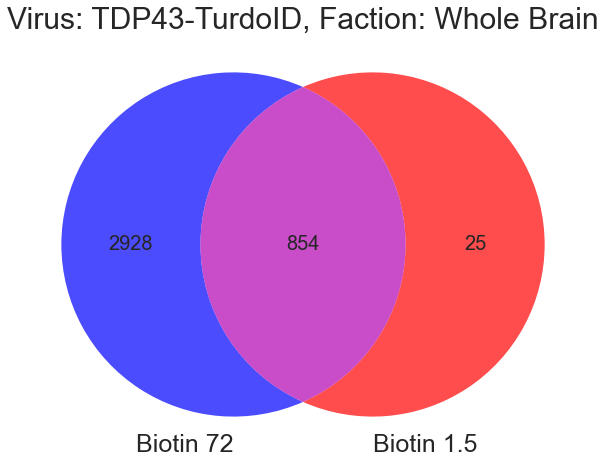

In [299]:
# Venn Diagram Biotin types
# TDP43TurboID_15_wholebrain, TDP43TurboID_72_wholebrain

TDP43TurboID_72_wholebrain_list = TDP43TurboID_72_wholebrain[TDP43TurboID_72_wholebrain["Hits"] != 0]["Protein_Name"].copy().to_list()
TDP43TurboID_15_wholebrain_list = TDP43TurboID_15_wholebrain[TDP43TurboID_15_wholebrain["Hits"] != 0]["Protein_Name"].copy().to_list()
union_list = TDP43TurboID_15_wholebrain_list + TDP43TurboID_72_wholebrain_list

union_list = set([x for x in union_list if union_list.count(x) > 1])
TDP43TurboID_72_wholebrain_list = set([x for x in TDP43TurboID_72_wholebrain_list if x not in union_list])
TDP43TurboID_15_wholebrain_list = set([x for x in TDP43TurboID_15_wholebrain_list if x not in union_list])
print(len(union_list), len(TDP43TurboID_72_wholebrain_list), len(TDP43TurboID_15_wholebrain_list))

plt.figure(figsize=(10,12), facecolor='white') 
plt.title("Virus: TDP43-TurdoID, Faction: Whole Brain", size = 30)
ax = plt.gca()
vd = venn2_unweighted(subsets = (len(TDP43TurboID_72_wholebrain_list), len(TDP43TurboID_15_wholebrain_list), len(union_list)), set_colors=("blue","red"), set_labels = ('Biotin 72', 'Biotin 1.5'), alpha = 0.7)

for text in vd.set_labels:
   text.set_fontsize(25)

for text in vd.subset_labels:
   text.set_fontsize(20)

plt.show()


2077 1705 56


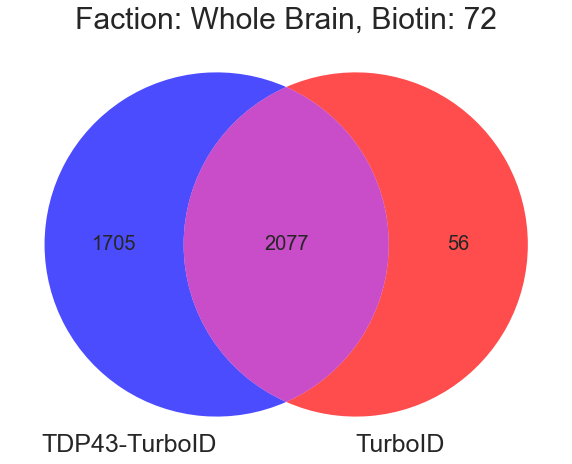

In [300]:
# Venn Diagram Biotin types
# TDP43TurboID_72_wholebrain, TurboID_72_wholebrain

TDP43TurboID_72_wholebrain_list = TDP43TurboID_72_wholebrain[TDP43TurboID_72_wholebrain["Hits"] != 0]["Protein_Name"].copy().to_list()
TurboID_72_wholebrain_list = TurboID_72_wholebrain[TurboID_72_wholebrain["Hits"] != 0]["Protein_Name"].copy().to_list()
union_list = TurboID_72_wholebrain_list + TDP43TurboID_72_wholebrain_list

union_list = set([x for x in union_list if union_list.count(x) > 1])
TDP43TurboID_72_wholebrain_list = set([x for x in TDP43TurboID_72_wholebrain_list if x not in union_list])
TurboID_72_wholebrain_list = set([x for x in TurboID_72_wholebrain_list if x not in union_list])
print(len(union_list), len(TDP43TurboID_72_wholebrain_list), len(TurboID_72_wholebrain_list))

plt.figure(figsize=(10,12), facecolor='white') 
plt.title("Faction: Whole Brain, Biotin: 72", size = 30)
ax = plt.gca()
vd = venn2_unweighted(subsets = (len(TDP43TurboID_72_wholebrain_list), len(TurboID_72_wholebrain_list), len(union_list)), set_colors=("blue","red"), set_labels = ('TDP43-TurboID', 'TurboID'), alpha = 0.7)

for text in vd.set_labels:
   text.set_fontsize(25)

for text in vd.subset_labels:
   text.set_fontsize(20)

plt.show()

4183 202 460


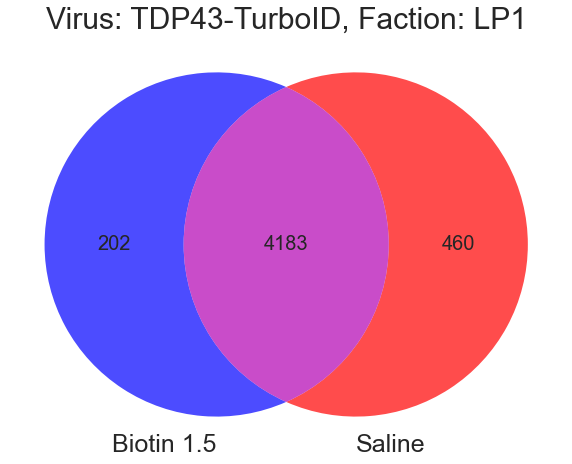

In [301]:
# Venn Diagram Biotin types
# TDP43TurboID_15_LP1, TDP43TurboID_saline_LP1

TDP43TurboID_15_LP1_list = TDP43TurboID_15_LP1[TDP43TurboID_15_LP1["Hits"] != 0]["Protein_Name"].copy().to_list()
TDP43TurboID_saline_LP1_list = TDP43TurboID_saline_LP1[TDP43TurboID_saline_LP1["Hits"] != 0]["Protein_Name"].copy().to_list()
union_list = TDP43TurboID_15_LP1_list + TDP43TurboID_saline_LP1_list

union_list = set([x for x in union_list if union_list.count(x) > 1])
TDP43TurboID_15_LP1_list = set([x for x in TDP43TurboID_15_LP1_list if x not in union_list])
TDP43TurboID_saline_LP1_list = set([x for x in TDP43TurboID_saline_LP1_list if x not in union_list])
print(len(union_list), len(TDP43TurboID_15_LP1_list), len(TDP43TurboID_saline_LP1_list))

plt.figure(figsize=(10,12), facecolor='white') 
plt.title("Virus: TDP43-TurboID, Faction: LP1", size = 30)
ax = plt.gca()
vd = venn2_unweighted(subsets = (len(TDP43TurboID_15_LP1_list), len(TDP43TurboID_saline_LP1_list), len(union_list)), set_colors=("blue","red"), set_labels = ('Biotin 1.5', 'Saline'), alpha = 0.7)

for text in vd.set_labels:
   text.set_fontsize(25)

for text in vd.subset_labels:
   text.set_fontsize(20)

plt.show()

537 3819 30


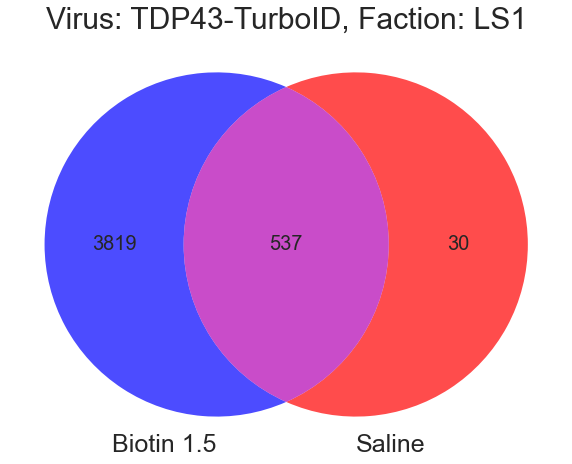

In [302]:
# Venn Diagram Biotin types
# TDP43TurboID_15_LS1, TurboID_saline_LS1

TDP43TurboID_15_LS1_list = TDP43TurboID_15_LS1[TDP43TurboID_15_LS1["Hits"] != 0]["Protein_Name"].copy().to_list()
TDP43TurboID_saline_LS1_list = TDP43TurboID_saline_LS1[TDP43TurboID_saline_LS1["Hits"] != 0]["Protein_Name"].copy().to_list()
union_list = TDP43TurboID_15_LS1_list + TDP43TurboID_saline_LS1_list

union_list = set([x for x in union_list if union_list.count(x) > 1])
TDP43TurboID_15_LS1_list = set([x for x in TDP43TurboID_15_LS1_list if x not in union_list])
TDP43TurboID_saline_LS1_list = set([x for x in TDP43TurboID_saline_LS1_list if x not in union_list])
print(len(union_list), len(TDP43TurboID_15_LS1_list), len(TDP43TurboID_saline_LS1_list))

plt.figure(figsize=(10,12), facecolor='white') 
plt.title("Virus: TDP43-TurboID, Faction: LS1", size = 30)
ax = plt.gca()
vd = venn2_unweighted(subsets = (len(TDP43TurboID_15_LS1_list), len(TDP43TurboID_saline_LS1_list), len(union_list)), set_colors=("blue","red"), set_labels = ('Biotin 1.5', 'Saline'), alpha = 0.7)

for text in vd.set_labels:
   text.set_fontsize(25)

for text in vd.subset_labels:
   text.set_fontsize(20)

plt.show()

Total number of Proteins accounted for: 4502
116 1915 1904 15 15 7 530
Total number of Proteins after instersections: 4502


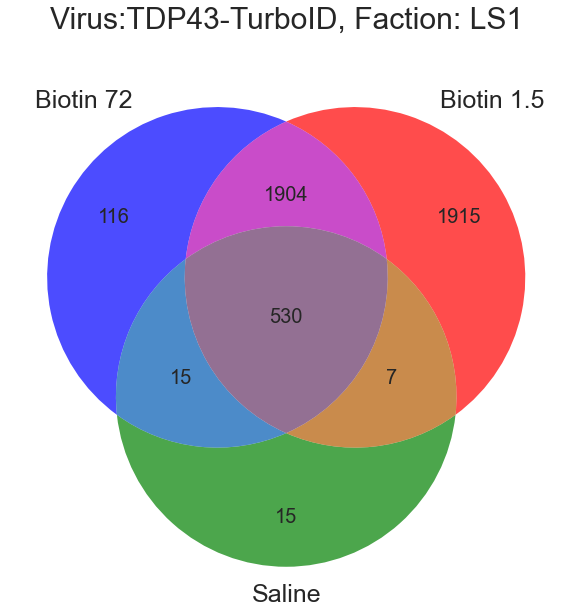

In [303]:
# Venn Diagram Biotin types
# TDP43TurboID_72_LS1, TDP43TurboID_15_LS1, TDP43TurboID_saline_LS1

TDP43TurboID_72_LS1_list = TDP43TurboID_72_LS1[TDP43TurboID_72_LS1["Hits"] != 0]["Protein_Name"].copy().to_list()
TDP43TurboID_15_LS1_list = TDP43TurboID_15_LS1[TDP43TurboID_15_LS1["Hits"] != 0]["Protein_Name"].copy().to_list()
TDP43TurboID_saline_LS1_list = TDP43TurboID_saline_LS1[TDP43TurboID_saline_LS1["Hits"] != 0]["Protein_Name"].copy().to_list()

print("Total number of Proteins accounted for:", len(set(TDP43TurboID_72_LS1_list + TDP43TurboID_15_LS1_list + TDP43TurboID_saline_LS1_list)))

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

def diff(lst1, lst2):
   return list(set(lst1) - set(lst2))

union_list_72_15 = intersection(TDP43TurboID_72_LS1_list, TDP43TurboID_15_LS1_list)
union_list_72_saline = intersection(TDP43TurboID_72_LS1_list, TDP43TurboID_saline_LS1_list)
union_list_15_saline = intersection(TDP43TurboID_15_LS1_list, TDP43TurboID_saline_LS1_list)
union_list = intersection(intersection(union_list_72_15, union_list_72_saline), union_list_15_saline)

union_list_72_15_reduced = diff(union_list_72_15, union_list)
union_list_72_saline_reduced = diff(union_list_72_saline, union_list)
union_list_15_saline_reduced = diff(union_list_15_saline, union_list)

TDP43TurboID_72_LS1_list_reduced = diff(diff(TDP43TurboID_72_LS1_list, TDP43TurboID_15_LS1_list), TDP43TurboID_saline_LS1_list)
TDP43TurboID_15_LS1_list_reduced = diff(diff(TDP43TurboID_15_LS1_list, TDP43TurboID_72_LS1_list), TDP43TurboID_saline_LS1_list)
TDP43TurboID_saline_LS1_list_reduced = diff(diff(TDP43TurboID_saline_LS1_list, TDP43TurboID_72_LS1_list), TDP43TurboID_15_LS1_list)

print(len(TDP43TurboID_72_LS1_list_reduced), len(TDP43TurboID_15_LS1_list_reduced), len(union_list_72_15_reduced),
                                len(TDP43TurboID_saline_LS1_list_reduced), len(union_list_72_saline_reduced), len(union_list_15_saline_reduced),
                                len(union_list))
print("Total number of Proteins after instersections:", len(union_list) + len(union_list_72_15_reduced) + len(union_list_72_saline_reduced) + len(union_list_15_saline_reduced)
 + len(TDP43TurboID_72_LS1_list_reduced) + len(TDP43TurboID_15_LS1_list_reduced) + len(TDP43TurboID_saline_LS1_list_reduced))

plt.figure(figsize=(10,12), facecolor='white') 
plt.title("Virus:TDP43-TurboID, Faction: LS1\n", size = 30)
ax = plt.gca()
vd = venn3_unweighted(subsets = (len(TDP43TurboID_72_LS1_list_reduced), len(TDP43TurboID_15_LS1_list_reduced), len(union_list_72_15_reduced),
                                len(TDP43TurboID_saline_LS1_list_reduced), len(union_list_72_saline_reduced), len(union_list_15_saline_reduced),
                                len(union_list)), set_colors=("blue","red", "green"), set_labels = ('Biotin 72', 'Biotin 1.5', 'Saline'), alpha = 0.7)

for text in vd.set_labels:
   text.set_fontsize(25)

for text in vd.subset_labels:
   text.set_fontsize(20)

plt.show()

# Cluster Heatmap

In [304]:
# TurboID virus & 72 Biotin combonations
TurboID_72_LP1 = TDP43TurboID_saline_LS1.copy()[["Protein_Name", "Hits"]]
TurboID_72_wholebrain = TurboID_72_wholebrain.copy()[["Protein_Name", "Hits"]]
TurboID_72_LS1 = TurboID_72_LS1.copy()[["Protein_Name", "Hits"]]
TurboID_72_Nuclear = TurboID_72_Nuclear.copy()[["Protein_Name", "Hits"]]

# TurboID virus & 1.5 Biotin combonations
TurboID_15_LP1 = TurboID_15_LP1.copy()[["Protein_Name", "Hits"]]
TurboID_15_wholebrain = TurboID_15_wholebrain.copy()[["Protein_Name", "Hits"]]
TurboID_15_LS1 = TurboID_15_LS1.copy()[["Protein_Name", "Hits"]]
TurboID_15_Nuclear = TurboID_15_Nuclear.copy()[["Protein_Name", "Hits"]]

# TurboID virus & saline Biotin combonations
TurboID_saline_LP1 = TurboID_saline_LP1.copy()[["Protein_Name", "Hits"]]
TurboID_saline_wholebrain = TurboID_saline_wholebrain.copy()[["Protein_Name", "Hits"]]
TurboID_saline_LS1 = TurboID_saline_LS1.copy()[["Protein_Name", "Hits"]]
TurboID_saline_Nuclear = TurboID_saline_Nuclear.copy()[["Protein_Name", "Hits"]]

# TDP43-TurboID virus & 72 Biotin combonations
TDP43TurboID_72_LP1 = TDP43TurboID_72_LP1.copy()[["Protein_Name", "Hits"]]
TDP43TurboID_72_wholebrain = TDP43TurboID_72_wholebrain.copy()[["Protein_Name", "Hits"]]
TDP43TurboID_72_LS1 = TDP43TurboID_72_LS1.copy()[["Protein_Name", "Hits"]]
TDP43TurboID_72_Nuclear = TDP43TurboID_72_Nuclear.copy()[["Protein_Name", "Hits"]]

# TDP43-TurboID virus & 1.5 Biotin combonations
TDP43TurboID_15_LP1 =TDP43TurboID_15_LP1.copy()[["Protein_Name", "Hits"]]
TDP43TurboID_15_wholebrain = TDP43TurboID_15_wholebrain.copy()[["Protein_Name", "Hits"]]
TDP43TurboID_15_LS1 = TDP43TurboID_15_LS1.copy()[["Protein_Name", "Hits"]]
TDP43TurboID_15_Nuclear = TDP43TurboID_15_Nuclear.copy()[["Protein_Name", "Hits"]]

# TDP43-TurboID virus & saline Biotin combonations
TDP43TurboID_saline_LP1 = TDP43TurboID_saline_LP1.copy()[["Protein_Name", "Hits"]]
TDP43TurboID_saline_wholebrain = TDP43TurboID_saline_wholebrain.copy()[["Protein_Name", "Hits"]]
TDP43TurboID_saline_LS1 = TDP43TurboID_saline_LS1.copy()[["Protein_Name", "Hits"]]
TDP43TurboID_saline_Nuclear = TDP43TurboID_saline_Nuclear.copy()[["Protein_Name", "Hits"]]

In [305]:
# TurboID virus & 72 Biotin combonations
print(len(TurboID_72_LP1)) 
print(len(TurboID_72_wholebrain))
print(len(TurboID_72_LS1))
print(len(TurboID_72_Nuclear))

# TurboID virus & 1.5 Biotin combonations
print(len(TurboID_15_LP1))
print(len(TurboID_15_wholebrain))
print(len(TurboID_15_LS1))
print(len(TurboID_15_Nuclear))

# TurboID virus & saline Biotin combonations
print(len(TurboID_saline_LP1))
print(len(TurboID_saline_wholebrain))
print(len(TurboID_saline_LS1))
print(len(TurboID_saline_Nuclear))

# TDP43-TurboID virus & 72 Biotin combonations
print(len(TDP43TurboID_72_LP1))
print(len(TDP43TurboID_72_wholebrain))
print(len(TDP43TurboID_72_LS1))
print(len(TDP43TurboID_72_Nuclear))

# TDP43-TurboID virus & 1.5 Biotin combonations
print(len(TDP43TurboID_15_LP1))
print(len(TDP43TurboID_15_wholebrain))
print(len(TDP43TurboID_15_LS1))
print(len(TDP43TurboID_15_Nuclear))

# TDP43-TurboID virus & saline Biotin combonations
print(len(TDP43TurboID_saline_LP1))
print(len(TDP43TurboID_saline_wholebrain))
print(len(TDP43TurboID_saline_LS1))
print(len(TDP43TurboID_saline_Nuclear))

5883
5883
5883
0
0
5883
0
0
0
0
0
0
5883
5883
5883
0
5883
5883
5883
5883
5883
0
5883
0


In [306]:
# useful dfs
# TurboID_72_LP1, TurboID_72_wholebrain, TurboID_72_LS1, TurboID_15_wholebrain, TDP43TurboID_72_LP1
# TDP43TurboID_72_wholebrain, TDP43TurboID_72_LS1, TDP43TurboID_15_LP1, TDP43TurboID_15_wholebrain, TDP43TurboID_15_LS1
# TDP43TurboID_15_Nuclear, TDP43TurboID_saline_LP1, TDP43TurboID_saline_LS1

TurboID_72_LP1 = TurboID_72_LP1.rename(columns = {"Hits": "TurboID_72_LP1"})
TurboID_72_wholebrain = TurboID_72_wholebrain.rename(columns = {"Hits": "TurboID_72_wholebrain"})
TurboID_72_LS1 = TurboID_72_LS1.rename(columns = {"Hits": "TurboID_72_LS1"})
TurboID_72_Nuclear = TurboID_72_Nuclear.rename(columns = {"Hits": "TurboID_72_Nuclear"})
TurboID_15_wholebrain = TurboID_15_wholebrain.rename(columns = {"Hits": "TurboID_15_wholebrain"})
TDP43TurboID_72_LP1 = TDP43TurboID_72_LP1.rename(columns = {"Hits": "TDP43TurboID_72_LP1"})
TDP43TurboID_72_wholebrain = TDP43TurboID_72_wholebrain.rename(columns = {"Hits": "TDP43TurboID_72_wholebrain"})
TDP43TurboID_72_LS1 = TDP43TurboID_72_LS1.rename(columns = {"Hits": "TDP43TurboID_72_LS1"})
TDP43TurboID_15_LP1 = TDP43TurboID_15_LP1.rename(columns = {"Hits": "TDP43TurboID_15_LP1"})
TDP43TurboID_15_wholebrain = TDP43TurboID_15_wholebrain.rename(columns = {"Hits": "TDP43TurboID_15_wholebrain"})
TDP43TurboID_15_LS1 = TDP43TurboID_15_LS1.rename(columns = {"Hits": "TDP43TurboID_15_LS1"})
TDP43TurboID_15_Nuclear = TDP43TurboID_15_Nuclear.rename(columns = {"Hits": "TDP43TurboID_15_Nuclear"})
TDP43TurboID_saline_LP1 = TDP43TurboID_saline_LP1.rename(columns = {"Hits": "TDP43TurboID_saline_LP1"})
TDP43TurboID_saline_LS1 = TDP43TurboID_saline_LS1.rename(columns = {"Hits": "TDP43TurboID_saline_LS1"})

merge_df = TurboID_72_LP1.merge(TurboID_72_wholebrain, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TurboID_72_LS1, how = "inner", on = "Protein_Name")
# merge_df = merge_df.merge(TurboID_15_wholebrain, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TDP43TurboID_72_LP1, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TDP43TurboID_72_wholebrain, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TDP43TurboID_72_LS1, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TDP43TurboID_15_LP1, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TDP43TurboID_15_wholebrain, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TDP43TurboID_15_LS1, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TDP43TurboID_15_Nuclear, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TDP43TurboID_saline_LP1, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TDP43TurboID_saline_LS1, how = "inner", on = "Protein_Name")

merge_df["Protein_Name"] = merge_df.apply(lambda x : x["Protein_Name"].split(";")[0] if len(x["Protein_Name"].split(";")) != 1 else x["Protein_Name"], axis = 1)
merge_df = merge_df.set_index('Protein_Name')
merge_df.head()

,TurboID_72_LP1,TurboID_72_wholebrain,TurboID_72_LS1,TDP43TurboID_72_LP1,TDP43TurboID_72_wholebrain,TDP43TurboID_72_LS1,TDP43TurboID_15_LP1,TDP43TurboID_15_wholebrain,TDP43TurboID_15_LS1,TDP43TurboID_15_Nuclear,TDP43TurboID_saline_LP1,TDP43TurboID_saline_LS1
Protein_Name,,,,,,,,,,,,
TMPSD_MOUSE,57498600.0,94606200.0,51148200.0,20398400.0,87778500.0,42966300.0,90534400.0,89830900.0,82110900.0,119068000.0,55036800.0,57498600.0
MACF1_MOUSE,43359900.0,1545245.0,0.0,63307700.0,5017606.0,594167.0,2577840.0,236609.0,4325790.0,0.0,4079100.0,43359900.0
E9QPD7_MOUSE,34019900.0,365235500.0,152748000.0,73830600.0,398770000.0,87967400.0,59018000.0,88587200.0,27217800.0,38133300.0,114552000.0,34019900.0
K1C17_MOUSE,29730700.0,219053300.0,60641900.0,45022400.0,189748120.0,100687000.0,119307000.0,90748200.0,106735000.0,86980600.0,167563000.0,29730700.0
K1C10-2_MOUSE,23199600.0,60833500.0,39109700.0,24306800.0,77834000.0,56023900.0,54989500.0,67188700.0,63966200.0,97492900.0,96177900.0,23199600.0


In [307]:
limit = 50_000

merge_filtered_df = merge_df[(merge_df.sum(axis=1) > limit)]
merge_filtered_df_half_bil = merge_df[(merge_df.sum(axis=1) > 500_000_000)]
merge_filtered_df_bil = merge_df[(merge_df.sum(axis=1) > 1_000_000_000)]
merge_filtered_df_2_bil = merge_df[(merge_df.sum(axis=1) > 2_000_000_000)]

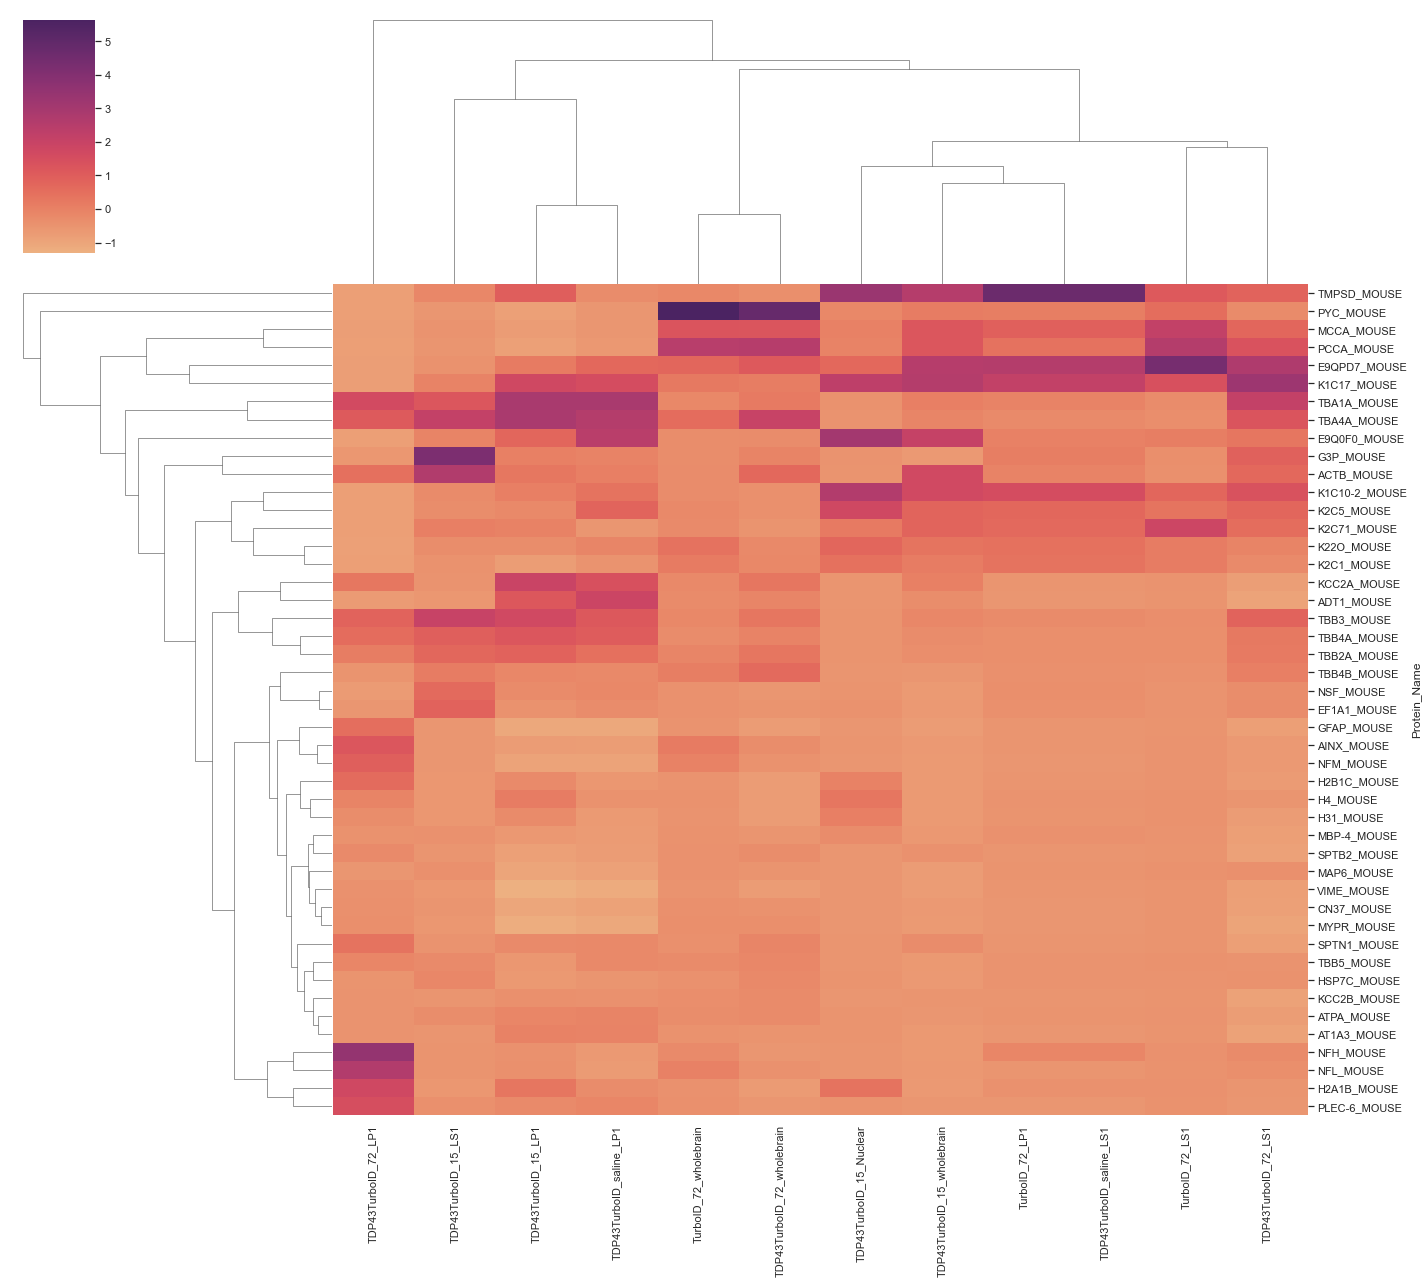

In [320]:

# Default plot
sns.clustermap(merge_filtered_df, figsize=(20,18), dendrogram_ratio=0.25, z_score= 1, cmap='flare')

#sns.clustermap(merge_filtered_df_half_bil, figsize=(18,12), dendrogram_ratio=0.3, z_score= 1, cmap='flare')
# sns.clustermap(merge_filtered_df_bil, figsize=(18,12), dendrogram_ratio=0.3, z_score= 1, cmap='flare')
# sns.clustermap(merge_filtered_df_2_bil, figsize=(18,12), dendrogram_ratio=0.3, z_score= 1, cmap='flare')


# Show the graph
plt.show()